In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns


import matplotlib.pyplot as plt

In [2]:
Customers_df= pd.read_csv('/Users/nithyananthans/OpenClassRoom/OpenClassroom/Project 5/customers.csv');
Products_df= pd.read_csv('/Users/nithyananthans/OpenClassRoom/OpenClassroom/Project 5/products.csv');
Transactions_df= pd.read_csv('/Users/nithyananthans/OpenClassRoom/OpenClassroom/Project 5/transactions.csv');

# Task 1 Data Cleansing

In [3]:
print(Products_df.describe())

             price        categ
count  3287.000000  3287.000000
mean     21.856641     0.370246
std      29.847908     0.615387
min      -1.000000     0.000000
25%       6.990000     0.000000
50%      13.060000     0.000000
75%      22.990000     1.000000
max     300.000000     2.000000


In [4]:
print(Customers_df.describe())

             birth
count  8623.000000
mean   1978.280877
std      16.919535
min    1929.000000
25%    1966.000000
50%    1979.000000
75%    1992.000000
max    2004.000000


In [5]:
Customers_df

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [6]:
Products_df

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [7]:
num_missing = (Products_df[['price']] < 0).sum()
print(num_missing)

price    1
dtype: int64


In [8]:
Outliner = Products_df.copy()
Outliner.sort_values("price", ascending = True)

,id_prod,price,categ
731,T_0,-1.00,0
2355,0_202,0.62,0
2272,0_528,0.62,0
370,0_120,0.66,0
1211,0_1844,0.77,0
...,...,...,...
2779,2_30,233.54,2
1436,2_167,236.99,2
394,2_158,247.22,2
724,2_76,254.44,2


In [9]:
Transactions_df.query("id_prod != 'T_0'",inplace = True) 
Transactions_df

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242
...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5


In [10]:
def first(string):
    parts = string.split(' ')
    first_part = parts[0]
    return first_part
Transactions_df["date"] = Transactions_df["date"].apply(first)
Transactions_df

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10,s_18746,c_4450
1,2_226,2022-02-03,s_159142,c_277
2,1_374,2021-09-23,s_94290,c_4270
3,0_2186,2021-10-17,s_105936,c_4597
4,0_1351,2021-07-17,s_63642,c_1242
...,...,...,...,...
337011,1_671,2021-05-28,s_40720,c_3454
337012,0_759,2021-06-19,s_50568,c_6268
337013,0_1256,2021-03-16,s_7219,c_4137
337014,2_227,2021-10-30,s_112349,c_5


In [11]:
merged = pd.merge(Customers_df, Transactions_df, on=['client_id'], how='right')
merged

,client_id,sex,birth,id_prod,date,session_id
0,c_4410,f,1967,0_1455,2021-03-22,s_9942
1,c_4410,f,1967,0_1376,2021-09-24,s_94984
2,c_4410,f,1967,1_312,2022-01-29,s_156960
3,c_4410,f,1967,1_653,2021-07-29,s_68860
4,c_4410,f,1967,0_1110,2021-11-04,s_114715
...,...,...,...,...,...,...
336811,c_84,f,1982,1_459,2022-02-17,s_166337
336812,c_84,f,1982,0_1050,2021-09-20,s_92701
336813,c_84,f,1982,0_1417,2021-03-13,s_5960
336814,c_84,f,1982,1_343,2021-04-13,s_19845


In [12]:
Source = pd.merge(Products_df, merged, on=['id_prod'], how='right')
Source

,id_prod,price,categ,client_id,sex,birth,date,session_id
0,0_1421,19.99,0.0,c_5152,f,1986,2021-04-17,s_21727
1,0_1421,19.99,0.0,c_2167,f,1960,2021-11-24,s_124134
2,0_1421,19.99,0.0,c_3060,m,1971,2021-04-06,s_16742
3,0_1421,19.99,0.0,c_7946,f,1987,2021-10-26,s_110147
4,0_1421,19.99,0.0,c_1934,f,2004,2021-12-23,s_138491
...,...,...,...,...,...,...,...,...
336811,0_2245,NaN,NaN,c_8138,f,1984,2021-10-04,s_100047
336812,0_2245,NaN,NaN,c_7416,m,1933,2021-11-12,s_118458
336813,0_2245,NaN,NaN,c_4283,f,1976,2021-09-01,s_83377
336814,0_2245,NaN,NaN,c_6236,f,1976,2022-02-25,s_170426


In [13]:
DF_2245 = Source.copy()
DF_2245.query('id_prod == "0_2245"', inplace = True)
DF_2245

,id_prod,price,categ,client_id,sex,birth,date,session_id
336713,0_2245,NaN,NaN,c_4505,m,1976,2022-01-09,s_147220
336714,0_2245,NaN,NaN,c_3468,f,1981,2021-09-11,s_88251
336715,0_2245,NaN,NaN,c_1403,f,1978,2022-02-15,s_165575
336716,0_2245,NaN,NaN,c_3065,f,1977,2022-01-26,s_155484
336717,0_2245,NaN,NaN,c_7102,m,1983,2021-04-25,s_25704
...,...,...,...,...,...,...,...,...
336811,0_2245,NaN,NaN,c_8138,f,1984,2021-10-04,s_100047
336812,0_2245,NaN,NaN,c_7416,m,1933,2021-11-12,s_118458
336813,0_2245,NaN,NaN,c_4283,f,1976,2021-09-01,s_83377
336814,0_2245,NaN,NaN,c_6236,f,1976,2022-02-25,s_170426


In [14]:
Prod_ch = Products_df.copy()
Prod_ch.query('id_prod == "0_2245"',inplace = True)
Prod_ch

,id_prod,price,categ


In [15]:
Source[Source.isna().any(axis=1)]

,id_prod,price,categ,client_id,sex,birth,date,session_id
336713,0_2245,NaN,NaN,c_4505,m,1976,2022-01-09,s_147220
336714,0_2245,NaN,NaN,c_3468,f,1981,2021-09-11,s_88251
336715,0_2245,NaN,NaN,c_1403,f,1978,2022-02-15,s_165575
336716,0_2245,NaN,NaN,c_3065,f,1977,2022-01-26,s_155484
336717,0_2245,NaN,NaN,c_7102,m,1983,2021-04-25,s_25704
...,...,...,...,...,...,...,...,...
336811,0_2245,NaN,NaN,c_8138,f,1984,2021-10-04,s_100047
336812,0_2245,NaN,NaN,c_7416,m,1933,2021-11-12,s_118458
336813,0_2245,NaN,NaN,c_4283,f,1976,2021-09-01,s_83377
336814,0_2245,NaN,NaN,c_6236,f,1976,2022-02-25,s_170426


In [16]:
Source = Source.dropna()

In [17]:
Source.sort_values(by="date",ascending = False)
Source

,id_prod,price,categ,client_id,sex,birth,date,session_id
0,0_1421,19.99,0.0,c_5152,f,1986,2021-04-17,s_21727
1,0_1421,19.99,0.0,c_2167,f,1960,2021-11-24,s_124134
2,0_1421,19.99,0.0,c_3060,m,1971,2021-04-06,s_16742
3,0_1421,19.99,0.0,c_7946,f,1987,2021-10-26,s_110147
4,0_1421,19.99,0.0,c_1934,f,2004,2021-12-23,s_138491
...,...,...,...,...,...,...,...,...
336708,1_140,38.56,1.0,c_974,f,1981,2021-03-30,s_13465
336709,1_140,38.56,1.0,c_4766,m,1989,2021-12-25,s_139663
336710,1_140,38.56,1.0,c_7406,m,1988,2021-12-09,s_131828
336711,0_1920,25.16,0.0,c_7748,f,1989,2021-05-30,s_41465


In [18]:
Source1 = Source[["price","date"]].copy()
Source1

,price,date
0,19.99,2021-04-17
1,19.99,2021-11-24
2,19.99,2021-04-06
3,19.99,2021-10-26
4,19.99,2021-12-23
...,...,...
336708,38.56,2021-03-30
336709,38.56,2021-12-25
336710,38.56,2021-12-09
336711,25.16,2021-05-30


In [19]:
#Source1["Sum"] = Source1.groupby(['date'])['price'].sum()

Source1 = Source1.groupby(['date']).sum()

In [20]:
Source1 = Source1.reset_index()

In [21]:
Source1

,date,price
0,2021-03-01,16416.24
1,2021-03-02,15337.47
2,2021-03-03,14751.75
3,2021-03-04,15047.09
4,2021-03-05,17173.41
...,...,...
360,2022-02-24,20189.72
361,2022-02-25,18181.96
362,2022-02-26,19759.58
363,2022-02-27,19021.83


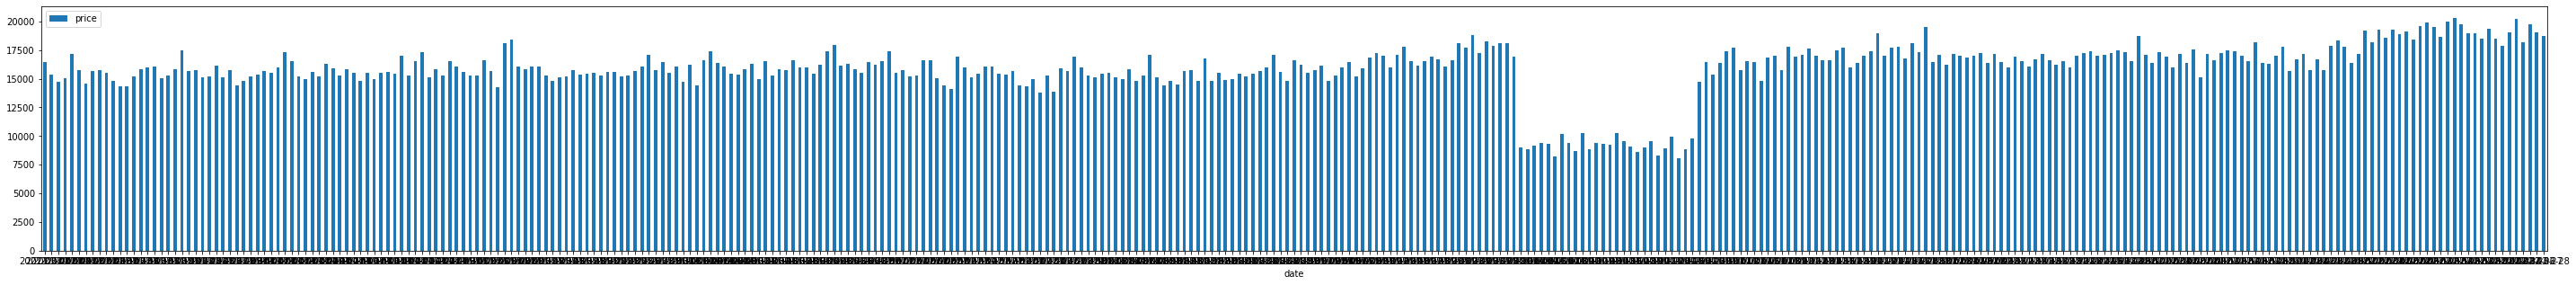

In [22]:
ax = Source1.plot.bar(x='date', y='price', rot=0,figsize=(50,5))

In [23]:
ax

In [24]:
Source1_cp = Source1.copy()

In [25]:
Source1_cp.set_index("date", inplace=True)
Source1_cp

,price
date,
2021-03-01,16416.24
2021-03-02,15337.47
2021-03-03,14751.75
2021-03-04,15047.09
2021-03-05,17173.41
...,...
2022-02-24,20189.72
2022-02-25,18181.96
2022-02-26,19759.58


In [26]:
pd.date_range(start = '2021-03-01', end = '2022-02-28' ).difference(Source1_cp.index)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [27]:
Source1["price"].mean()

15881.03498630131

In [28]:
Source1["price"].median()

16065.939999999926

In [29]:
Source1["price"].mode()

0       8076.04
1       8191.08
2       8318.88
3       8601.71
4       8676.67
         ...   
360    19759.58
361    19913.69
362    19997.23
363    20189.72
364    20302.89
Length: 365, dtype: float64

In [30]:
Source1["price"].std()

2221.9674848654595

In [31]:
Source1["price"].max()

20302.890000000083

In [32]:
Source1["price"].min()

8076.0399999999545

In [33]:
Source1["price"].describe()

count      365.000000
mean     15881.034986
std       2221.967485
min       8076.040000
25%      15269.520000
50%      16065.940000
75%      17053.060000
max      20302.890000
Name: price, dtype: float64

In [34]:
Source1_cp = Source1_cp.reset_index()

In [35]:
Source1_cp

,date,price
0,2021-03-01,16416.24
1,2021-03-02,15337.47
2,2021-03-03,14751.75
3,2021-03-04,15047.09
4,2021-03-05,17173.41
...,...,...
360,2022-02-24,20189.72
361,2022-02-25,18181.96
362,2022-02-26,19759.58
363,2022-02-27,19021.83


In [36]:
Transactions_df

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10,s_18746,c_4450
1,2_226,2022-02-03,s_159142,c_277
2,1_374,2021-09-23,s_94290,c_4270
3,0_2186,2021-10-17,s_105936,c_4597
4,0_1351,2021-07-17,s_63642,c_1242
...,...,...,...,...
337011,1_671,2021-05-28,s_40720,c_3454
337012,0_759,2021-06-19,s_50568,c_6268
337013,0_1256,2021-03-16,s_7219,c_4137
337014,2_227,2021-10-30,s_112349,c_5


In [37]:
Transactions_df['id_prod'].nunique()

3265

In [38]:
merged

,client_id,sex,birth,id_prod,date,session_id
0,c_4410,f,1967,0_1455,2021-03-22,s_9942
1,c_4410,f,1967,0_1376,2021-09-24,s_94984
2,c_4410,f,1967,1_312,2022-01-29,s_156960
3,c_4410,f,1967,1_653,2021-07-29,s_68860
4,c_4410,f,1967,0_1110,2021-11-04,s_114715
...,...,...,...,...,...,...
336811,c_84,f,1982,1_459,2022-02-17,s_166337
336812,c_84,f,1982,0_1050,2021-09-20,s_92701
336813,c_84,f,1982,0_1417,2021-03-13,s_5960
336814,c_84,f,1982,1_343,2021-04-13,s_19845


In [39]:
Source

,id_prod,price,categ,client_id,sex,birth,date,session_id
0,0_1421,19.99,0.0,c_5152,f,1986,2021-04-17,s_21727
1,0_1421,19.99,0.0,c_2167,f,1960,2021-11-24,s_124134
2,0_1421,19.99,0.0,c_3060,m,1971,2021-04-06,s_16742
3,0_1421,19.99,0.0,c_7946,f,1987,2021-10-26,s_110147
4,0_1421,19.99,0.0,c_1934,f,2004,2021-12-23,s_138491
...,...,...,...,...,...,...,...,...
336708,1_140,38.56,1.0,c_974,f,1981,2021-03-30,s_13465
336709,1_140,38.56,1.0,c_4766,m,1989,2021-12-25,s_139663
336710,1_140,38.56,1.0,c_7406,m,1988,2021-12-09,s_131828
336711,0_1920,25.16,0.0,c_7748,f,1989,2021-05-30,s_41465


/Users/nithyananthans/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:309: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


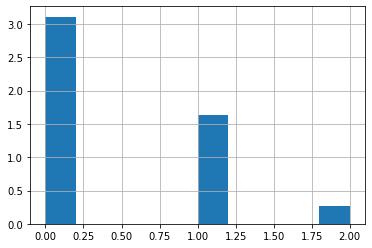

In [40]:
# Histogram
Source["categ"].hist(normed=True)
plt.show()

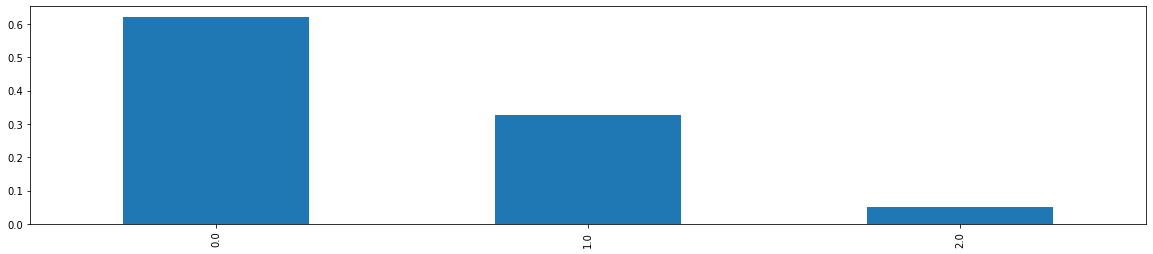

In [41]:
# Bar graph
Source["categ"].value_counts(normalize=True).plot(kind='bar',figsize=(20,4))
plt.show()

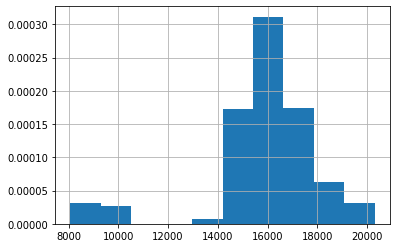

In [42]:
# Histogram
Source1_cp["price"].hist(normed=True)
plt.show()
# Prettier Histogram
#Source[Source.price.abs() < 10]["price"].hist(density=True,bins=20)
#plt.show()

In [43]:
Source.price.abs()

0         19.99
1         19.99
2         19.99
3         19.99
4         19.99
          ...  
336708    38.56
336709    38.56
336710    38.56
336711    25.16
336712    25.16
Name: price, Length: 336713, dtype: float64

In [44]:
Source.price.nunique()

1442

In [45]:
Source1

,date,price
0,2021-03-01,16416.24
1,2021-03-02,15337.47
2,2021-03-03,14751.75
3,2021-03-04,15047.09
4,2021-03-05,17173.41
...,...,...
360,2022-02-24,20189.72
361,2022-02-25,18181.96
362,2022-02-26,19759.58
363,2022-02-27,19021.83


In [51]:
pd.set_option('display.max_rows', None)

In [53]:
Source1_cp.describe()

,price
count,365.000000
mean,15881.034986
std,2221.967485
min,8076.040000
25%,15269.520000
50%,16065.940000
75%,17053.060000
max,20302.890000


In [54]:
Source1_cp.median()

price    16065.94
dtype: float64

In [61]:
Source1_cp.set_index("date", inplace=True)
Source1_cp

,price
date,
2021-03-01,16416.24
2021-03-02,15337.47
2021-03-03,14751.75
2021-03-04,15047.09
2021-03-05,17173.41
2021-03-06,15785.28
2021-03-07,14611.22
2021-03-08,15679.53
2021-03-09,15710.51


In [62]:
Source1_cp

,price
date,
2021-03-01,16416.24
2021-03-02,15337.47
2021-03-03,14751.75
2021-03-04,15047.09
2021-03-05,17173.41
2021-03-06,15785.28
2021-03-07,14611.22
2021-03-08,15679.53
2021-03-09,15710.51


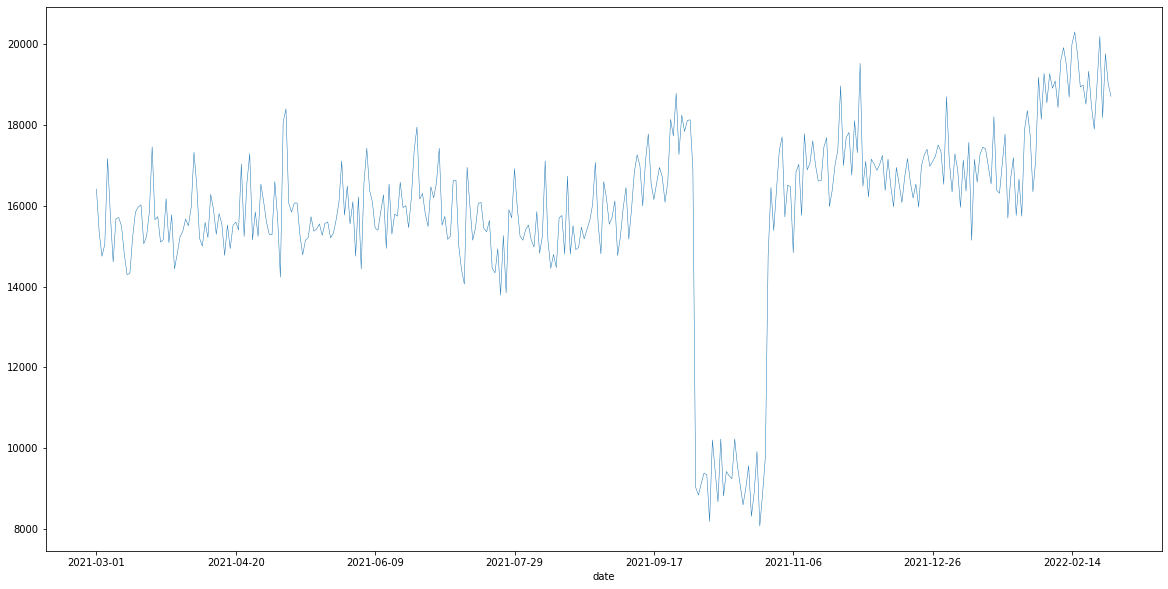

In [63]:
Source1_cp['price'].plot(linewidth=0.5,figsize=(20,10));

In [69]:
Source1_cp.loc['2021-10-01':'2021-10-31'] = 16065.94
Source1_cp

,price
date,
2021-03-01,16416.24
2021-03-02,15337.47
2021-03-03,14751.75
2021-03-04,15047.09
2021-03-05,17173.41
2021-03-06,15785.28
2021-03-07,14611.22
2021-03-08,15679.53
2021-03-09,15710.51


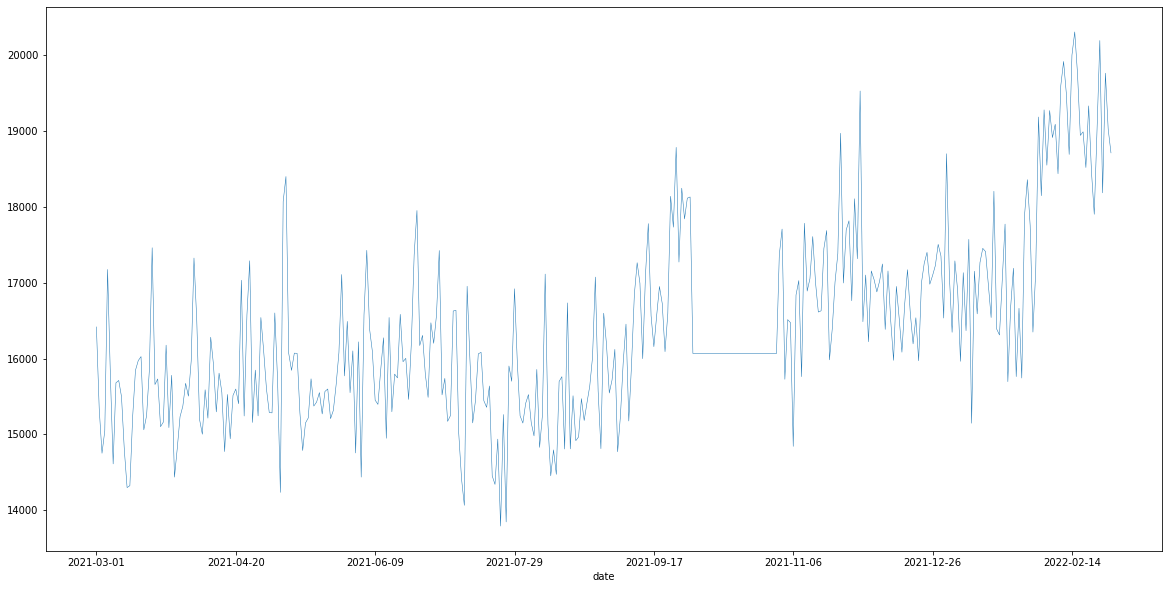

In [70]:
Source1_cp['price'].plot(linewidth=0.5,figsize=(20,10));

In [71]:
Source1_cp.describe()

,price
count,365.000000
mean,16371.128630
std,1216.584849
min,13792.210000
25%,15524.870000
50%,16065.940000
75%,17053.060000
max,20302.890000


In [67]:
imputeset = Source1_cp.copy() 
imputeset = imputeset.loc['2021-10-01':'2021-10-31']
imputeset.price = 16909.36
imputeset

,price
date,
2021-10-01,16909.36
2021-10-02,16909.36
2021-10-03,16909.36
2021-10-04,16909.36
2021-10-05,16909.36
2021-10-06,16909.36
2021-10-07,16909.36
2021-10-08,16909.36
2021-10-09,16909.36


In [48]:
# missing data for Oct, zoom in oct dataset to find our missing. 
# do an outlier analysis with box plot and impute value with median or mean  based on the outliers

# re-calculate gini co-efficient after outlier is fixed.

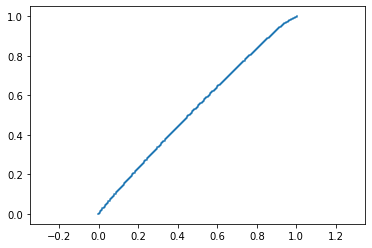

In [49]:
expenses = Source1['price']
exp = -expenses.values
n = len(exp)
lorenz = np.cumsum(np.sort(exp)) / exp.sum()
lorenz = np.append([0],lorenz) # The Lorenz Curve begins at 0

plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1) # There is 1 segment (of size n) for each individual, plus 1 segment at y=0. The first segment starts at 0-1/n and the last one finishes at 1+1/n
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.show()

In [50]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # area under the Lorenz Curve. The first segment (lorenz[0]) is halfly below O, so we divide it by 2. We do the same for the mast segment lorenz[-1]
S = 0.5 - AUC # area between 1st bisector and the Lorenz Curve
gini = 2*S
gini

-0.06805248803596542

In [75]:
Source1_cp = Source1_cp.reset_index()
Source1_cp

,date,price
0,2021-03-01,16416.24
1,2021-03-02,15337.47
2,2021-03-03,14751.75
3,2021-03-04,15047.09
4,2021-03-05,17173.41
5,2021-03-06,15785.28
6,2021-03-07,14611.22
7,2021-03-08,15679.53
8,2021-03-09,15710.51
9,2021-03-10,15496.87


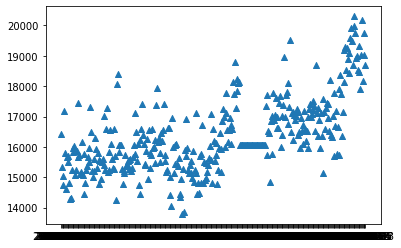

In [76]:
plt.scatter(Source1_cp.date,Source1_cp.price,marker="^")
plt.show()

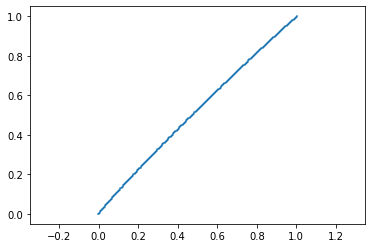

In [77]:
expenses = Source1_cp['price']
exp = -expenses.values
n = len(exp)
lorenz = np.cumsum(np.sort(exp)) / exp.sum()
lorenz = np.append([0],lorenz) # The Lorenz Curve begins at 0

plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1) # There is 1 segment (of size n) for each individual, plus 1 segment at y=0. The first segment starts at 0-1/n and the last one finishes at 1+1/n
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.show()

In [78]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # area under the Lorenz Curve. The first segment (lorenz[0]) is halfly below O, so we divide it by 2. We do the same for the mast segment lorenz[-1]
S = 0.5 - AUC # area between 1st bisector and the Lorenz Curve
gini = 2*S
gini

-0.040678423064091085